<a href="https://colab.research.google.com/github/RioDeMilo/RETAIL-PRICES-COLOMBIA/blob/main/IPC1823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Here it is all the libraries that i need in order to manage the data and to plot it `
import scipy as sci
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
import matplotlib.dates as mdates

In [ ]:
# for this project i previously modified all the data from each year of analysis to a sngle sheet page in excel. 
df = pd.read_excel('/content/Gropu19-22.xlsx')

In [ ]:
# This will get you the specified sheet page for further use.
# but for this case i used a excel file ith only one page so it is not necessary and you need to ad the datafrme and a dicttionary ith the name of the pages like
# sheet_name=['Hoja1']
#df = df.get('Hoja1')


# Data preparing
### Now we want to specify wheter we want to plot a spicified type of product 
but we should be able to see what type of products are available for comparison

```
# Tiene formato de código
```



In [ ]:
# typical use of .info() to get a general idea of what is the shape  of the data base look like
# .head() will let you see a more friendly view in a excel way 
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220517 entries, 0 to 220516
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Fecha                   220517 non-null  datetime64[ns]
 1   Grupo                   220517 non-null  object        
 2   Producto                220517 non-null  object        
 3   Fuente                  220517 non-null  object        
 4   Precio  por kilogramo*  220517 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 8.4+ MB


,Fecha,Grupo,Producto,Fuente,Precio por kilogramo*
0,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Armenia, Mercar",1065.0
1,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Barranquilla, Barranquillita",3000.0
2,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bogotá, D.C., Corabastos",764.0
3,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bucaramanga, Centroabastos",1556.0
4,2019-01-01,VERDURAS Y HORTALIZAS,Acelga,Chiquinquirá (Boyacá),1058.0


In [ ]:
df.rename(columns={"Precio  por kilogramo*": "Precio KG"}, inplace=True)

In [ ]:
# this is to set the 'Fecha' as the new index of the dataframe as it will mostly be a timeline analysis
# the inplace=True will set this ne index as the definitive index changing it in the database
df.set_index('Fecha', inplace=True)
df.head()

,Grupo,Producto,Fuente,Precio KG
Fecha,,,,
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Armenia, Mercar",1065.0
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Barranquilla, Barranquillita",3000.0
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bogotá, D.C., Corabastos",764.0
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bucaramanga, Centroabastos",1556.0
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,Chiquinquirá (Boyacá),1058.0


In [ ]:
# Here we can see that there are not null values in any of the columns
# if there were any null values we should take them into consideration because it can affect later anaylsis an graphing
pd.isnull(df).sum()

index        0
Fecha        0
Grupo        0
Producto     0
Fuente       0
Precio KG    0
dtype: int64

In [ ]:
# Here i'm seeing that the city is contained in the same column as the WHOLESALE center 
# we need to solve this after starting to gragh and do an analysis
df['Fuente'].value_counts()

Medellín, Central Mayorista de Antioquia       10154
Bogotá, D.C., Corabastos                        8070
Cúcuta, Cenabastos                              6865
Villavicencio, CAV                              6383
Ibagué, Plaza La 21                             6214
                                               ...  
Malambo, Atlantico                                46
Malambo (Atlántico), Carnes y Carnes              23
Ipiales (Nariño), Centro de Acopio                18
San Gil (Santander), Panela                        4
San Sebastián de Mariquita (Tolima), panela        3
Name: Fuente, Length: 91, dtype: int64

In [ ]:
# the process of split the values that have both the city and the WHOLESALE market need to be in a independet column
# but here you can see that there are values in the data base that have more than one comma that is dividing the values 
# bogota dc, corabastos should not have two commas only the comma that is differentiating it from a city and a market in the city
# we want then to get only two columns and not three
# i first used str.split but it split the string everytime that it find a comma
# it's best to use str.rsplit as it will start from the end to find a delimeter
df[['Ciudad','Plaza']] = df.Fuente.str.rsplit(',',n=1, expand = True)

In [ ]:
# in the star of the dataframe we can see that there are valuess that include the city but not the marketplace 
# it is important to take this into consideration
df.head()


,Grupo,Producto,Fuente,Precio KG,Ciudad,Plaza
Fecha,,,,,,
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Armenia, Mercar",1065.0,Armenia,Mercar
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Barranquilla, Barranquillita",3000.0,Barranquilla,Barranquillita
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bogotá, D.C., Corabastos",764.0,"Bogotá, D.C.",Corabastos
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,"Bucaramanga, Centroabastos",1556.0,Bucaramanga,Centroabastos
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,Chiquinquirá (Boyacá),1058.0,Chiquinquirá (Boyacá),None


In [ ]:
# here we count every vale from 0 to 50 to see whether there is a city misspelled

df.Ciudad.value_counts()[0:50]

Bogotá, D.C.                        18734
Medellín                            15561
Cali                                14576
Barranquilla                         9971
Cúcuta                               9715
Pereira                              8878
Bucaramanga                          8756
Villavicencio                        6383
Ibagué                               6214
Valledupar                           5986
Montería                             5959
Armenia                              5921
Popayán                              5647
Palmira (Valle del Cauca)            5523
Manizales                            5514
Neiva                                5476
Tuluá (Valle del Cauca)              5420
Cartagena                            5350
Sincelejo                            5249
Pasto                                4864
Tunja                                4837
Cartago (Valle del Cauca)            4716
Buenaventura (Valle del Cauca)       4320
Pamplona (Norte de Santander)     

In [ ]:
# i droped the Fuente value as it will not give me any value since 
# you will need the city and maybe a specific WHOLESALE market called "Plaza"
df = df.drop(['Fuente'],axis=1)
# here you can confirm that the data base is still the same only without the "Fuente" Column
df.head()

,Grupo,Producto,Precio KG,Ciudad,Plaza
Fecha,,,,,
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,1065.0,Armenia,Mercar
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,3000.0,Barranquilla,Barranquillita
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,764.0,"Bogotá, D.C.",Corabastos
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,1556.0,Bucaramanga,Centroabastos
2019-01-01,VERDURAS Y HORTALIZAS,Acelga,1058.0,Chiquinquirá (Boyacá),None


In [ ]:
# this is another part of the data cleaning and filtering 
#we see duplicates with differences in the upper letters
df['Grupo'].value_counts()


FRUTAS                           53015
VERDURAS Y HORTALIZAS            43664
CARNES                           32565
PROCESADOS                       32080
TUBERCULOS, RAICES Y PLATANOS    16948
GRANOS Y CEREALES                13366
PESCADOS                         10352
LACTEOS Y HUEVOS                  9418
Frutas                            2261
Verduras y Hortalizas             1893
Carnes                            1429
Procesados                        1387
Tubérculos, Raíces y Plátanos      704
Granos y Cereales                  578
Pescados                           448
Lácteos y Huevos                   409
Name: Grupo, dtype: int64

In [ ]:
# as you can see the str.lower will change all the 
# upper letters for lower case
df['Grupo'] = df['Grupo'].str.lower()

df['Grupo'].value_counts()

frutas                           55276
verduras y hortalizas            45557
carnes                           33994
procesados                       33467
tuberculos, raices y platanos    16948
granos y cereales                13944
pescados                         10800
lacteos y huevos                  9418
tubérculos, raíces y plátanos      704
lácteos y huevos                   409
Name: Grupo, dtype: int64

In [ ]:
# you can se the dict of values that i'm going to replce with the .replace function
dic = {'é': 'e', 'í': 'i','á':'a'}

In [ ]:
df.replace(dic, regex=True, inplace=True)

In [ ]:
df['Grupo'].value_counts()

frutas                           55276
verduras y hortalizas            45557
carnes                           33994
procesados                       33467
tuberculos, raices y platanos    17652
granos y cereales                13944
pescados                         10800
lacteos y huevos                  9827
Name: Grupo, dtype: int64

In [ ]:
# now we need to see wheter there may be other values such as ó or ú 
# for this we need to analyse the other types of products from each category 
# but instead we will find this values and if it exists in the data base
# if those values exists we will addd them to the dictionary to then replace them and get an homogeneus list


In [ ]:
# Thiss code reveal that there are no ó or ú in the data base that need to be replaced
# Then the code above of .replace wwill work just fine
### remember to add a list for ú and ó too
df['Grupo'].str.count('ú').sum()


0

In [ ]:
# here i replace the tring with a value o it is more easy to get values and analyze them witouth touching the principal code
# here noww e dont acll the list inide the iin function
# instead i used a vaariable to store a list that caaan containt all the types of groups of goods
G = ['frutas']
df2 = df[df['Grupo'].isin(G)]
df2['Producto'].value_counts()[0:30]

Tomate de arbol                 2262
Manzana verde importada         1848
Lulo                            1830
Mora de Castilla                1806
Manzana roja importada          1760
Guayaba pera                    1721
Banano criollo                  1709
Pera importada                  1606
Papaya Maradol                  1597
Manzana royal gala importada    1565
Maracuya                        1546
Aguacate papelillo              1533
Mango Tommy                     1521
Limón Tahiti                    1444
Limón común                     1404
Granadilla                      1347
Uva Isabela                     1328
Piña gold                       1309
Melón Cantalup                  1254
Naranja Valencia                1231
Patilla                         1188
Guanabana                       1183
Fresa                           1172
Curuba                          1101
Kiwi                            1067
Uva red globe nacional           880
Piña perolera                    832
M

In [ ]:
C = ['Ibague']
P = ['Mango Tommy']
dfp = df2[df2["Producto"].isin(P)]
dfpc = df2[(df2["Producto"].isin(P)) & (df2['Ciudad'].isin(C))]

In [ ]:
dfpc

,Grupo,Producto,Precio KG,Ciudad,Plaza
Fecha,,,,,
2019-01-01,frutas,Mango Tommy,1228.0,Ibague,Plaza La 21
2019-02-01,frutas,Mango Tommy,1668.0,Ibague,Plaza La 21
2019-03-01,frutas,Mango Tommy,2267.0,Ibague,Plaza La 21
2019-04-01,frutas,Mango Tommy,1036.0,Ibague,Plaza La 21
2019-05-01,frutas,Mango Tommy,1021.0,Ibague,Plaza La 21
2019-06-01,frutas,Mango Tommy,1887.0,Ibague,Plaza La 21
2019-10-01,frutas,Mango Tommy,1467.0,Ibague,Plaza La 21
2019-11-01,frutas,Mango Tommy,1315.0,Ibague,Plaza La 21
2019-12-01,frutas,Mango Tommy,1023.0,Ibague,Plaza La 21


##Idea
### create a function where if you dont choose a city you get a dataframe with all the countries and only the products given if not then return a dataframe with the product and city given

In [ ]:
# the join function map wil give us utomticlly the title of the entire grapichs that we are making
t = 'Precio KG de '+(' '.join(map(str, P)))+' en '+(' '.join(map(str, C)))


Text(0.5, 1.0, 'Precio KG de Mango Tommy en Ibague')

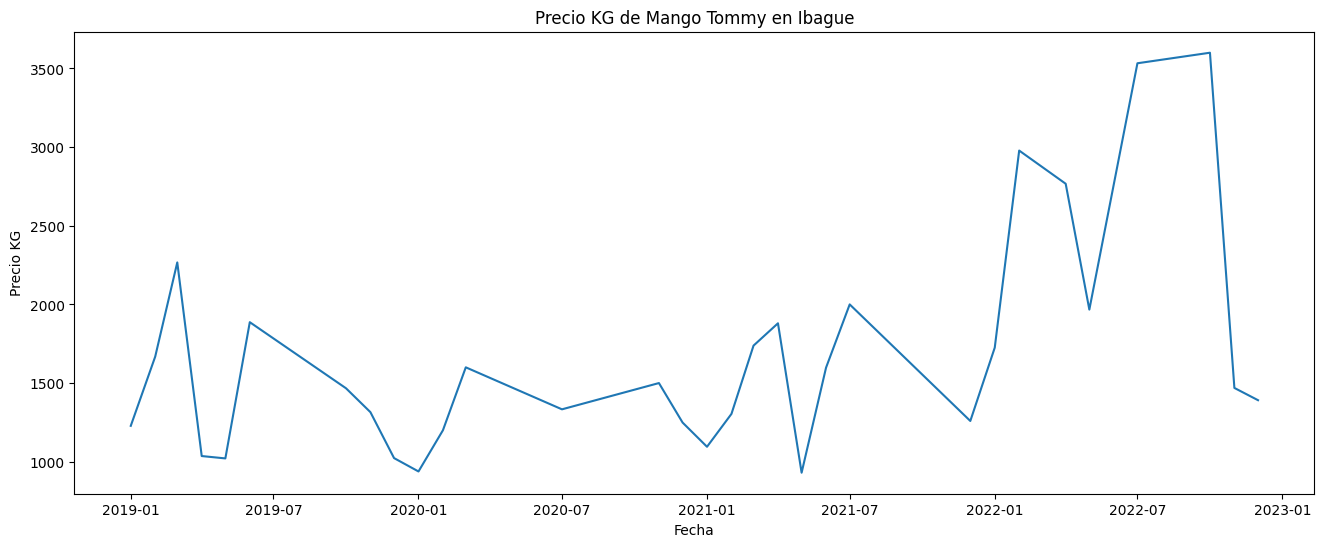

In [ ]:
# why are we seeing a strange graph?
# There are different value for the cities all raound the country we need to configure the data to bether understaand this
fig, ax = plt.subplots(figsize=(16, 6)) # thiss saves the fig  in the ax 
ax = sns.lineplot(data=dfpc, x="Fecha", y="Precio KG")# the ax value i the plotting of the cart
ax.set(
xlabel="Fecha",
ylabel="Precio KG",
)
ax.set_title(t)

In [ ]:
dfpc.describe()

,Precio KG
count,31.000000
mean,1676.322581
std,701.220098
min,930.000000
25%,1238.500000
50%,1469.000000
75%,1883.500000
max,3600.000000


In [ ]:
# instead of having a list we could also see it in the graph to get a better understanding of the min a max values
# this is a new datafrme called point
point = (dfpc['Precio KG'].min()) + (dfpc['Precio KG'].max())
point

4530.0

In [ ]:
# this is the y axis list that will have the mean value over the entire len of the dataframe
y=dfpc['Precio KG']
x=dfpc.index
y_avg = [np.mean(y)] * len(x)
# now we need a new line but with the mean value of the year 2022 but that crosses the entire year
y_22 = dfpc.loc["2022":"2023","Precio KG"]
y_avg22=[np.mean(y_22)]* len(x)

In [ ]:
# this proof that this linnne of code will change be a range of values that are all the same average and has a lenght of a specified array
[np.mean(y_avg22)]* len(x)

[2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75,
 2428.75]

In [ ]:
y_avg22 = dfpc.loc["2022":"2023","Precio KG"]

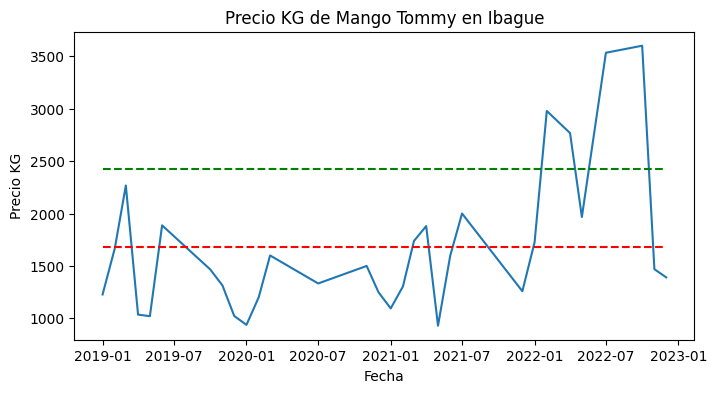

In [ ]:
# here i noted that is is first necessary to call the size of the figure general atrubites like the x annd y labels 
# and then set every plot that we wanted
x = dfpc.index
y = dfpc['Precio KG']
y_avg = [np.mean(y)] * len(x)
y_22 = dfpc.loc["2022":"2023","Precio KG"]
y_avg22=[np.mean(y_22)]* len(x)
plt.figure(figsize=(8,4))
plt.title(t)
plt.xlabel('Fecha')
plt.ylabel('Precio KG')
plt.plot(x, y)
plt.plot(x, y_avg, color='red', ls='--')
plt.plot(x,y_avg22, color="green",ls="--")
plt.show()

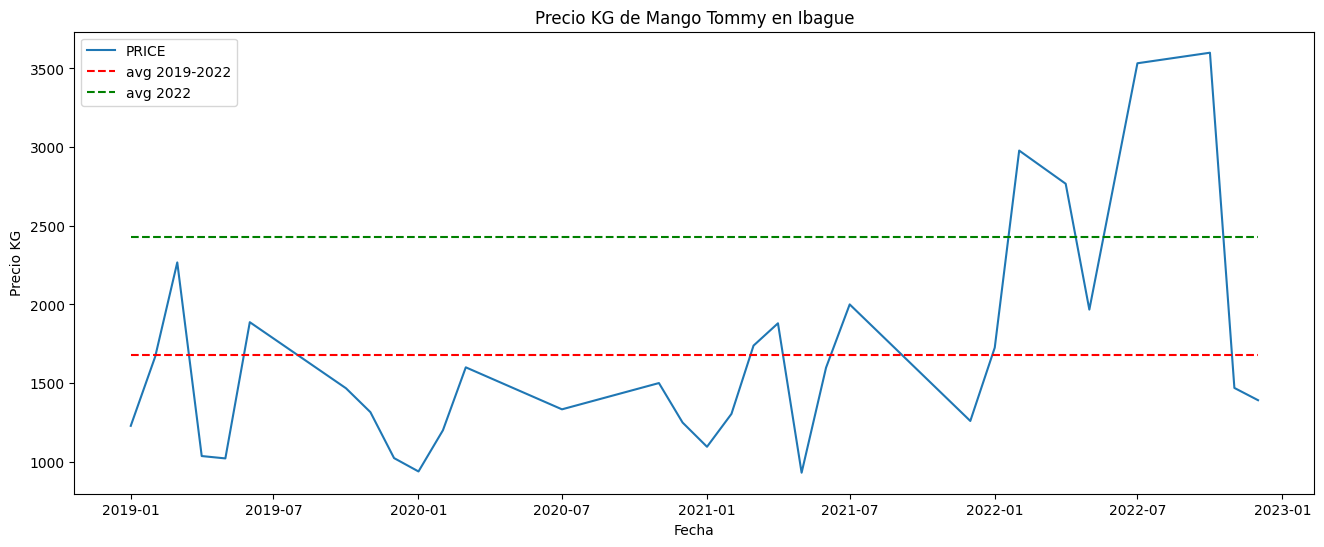

In [ ]:
# here i noted that is is first necessary to call the size of the figure general atrubites like the x annd y labels 
# and then set every plot that we wanted
x = dfpc.index
y = dfpc['Precio KG']
y_avg = [np.mean(y)] * len(x)
y_22 = dfpc.loc["2022":"2023","Precio KG"]
y_avg22=[np.mean(y_22)]* len(x)
plt.figure(figsize=(16,6))
plt.title(t)
plt.xlabel('Fecha')
plt.ylabel('Precio KG')
sns.lineplot(data =dfpc,x='Fecha',y='Precio KG',label ='PRICE')
plt.plot(x, y_avg, color='red', ls='--',label ='avg 2019-2022')
plt.plot(x,y_avg22, color="green",ls="--",label='avg 2022')
plt.legend(loc="upper left")
plt.show()

# now you can see that thiss line of seaborn .plotline is a better fit for our data 
# as the blue line representes the mean of all the valuess and 
# the gradient blue will represent data that represent each mean of the day calculated 

In [ ]:
# here we can see that for a single day of the month we get various values thanks to the different WHOLESALE markets
# that is why we get a timelinen gragh that does'nt look normal 
# maybe we should use other type of grapgh to better represent the differrent prices that you can see in a normal day 
dfpc.head()
'how to make a candle timeline in matplotlib'

'how to make a candle timeline in matplotlib'

<Axes: xlabel='Fecha', ylabel='Precio KG'>

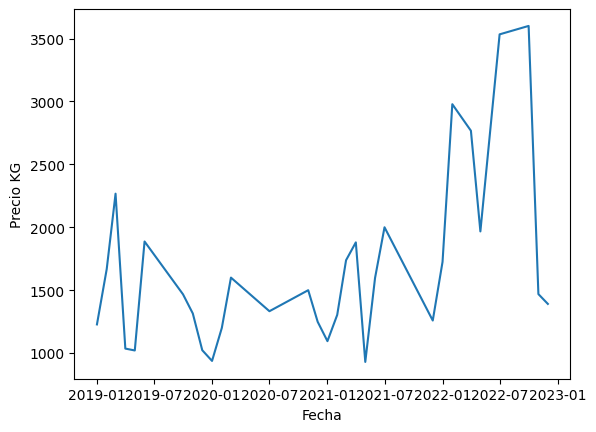

In [ ]:
sns.lineplot(data=dfpc, x="Fecha", y="Precio KG")

In [ ]:
# here you will find the prices with less and more variationa across the cities 
print(dfpc.describe().round(),
      t,dfp.describe().round())

       Precio KG
count       31.0
mean      1676.0
std        701.0
min        930.0
25%       1238.0
50%       1469.0
75%       1884.0
max       3600.0 Precio KG de Mango Tommy en Ibague        Precio KG
count     1521.0
mean      2882.0
std       1548.0
min        767.0
25%       1776.0
50%       2413.0
75%       3457.0
max       9917.0


In [ ]:
# here we are seeing the product and its standart deviaation by citie 
# so we can see where are the products with less variation in its prices
# it is correct the clarify that less variation in the prices 
# doesn't necessarly meaan lower prices
std=dfp.groupby('Ciudad')['Precio KG'].std().round()
std.nlargest(5)
std.nsmallest(5)

Ciudad
Cartagena                         290.0
Buenaventura (Valle del Cauca)    526.0
Monteria                          596.0
Armenia                           611.0
Ibague                            701.0
Name: Precio KG, dtype: float64

In [ ]:
# here you can see that we use the same function to call the max a min values of the dataframe 
# maaybe we can use a function to save lines of code
M= dfp.groupby('Ciudad')['Precio KG'].mean()
M.nlargest(5)
M.nsmallest(5)

Ciudad
Armenia                1656.837838
Ibague                 1676.322581
Monteria               1737.812500
Cartagena              1805.466667
Socorro (Santander)    1960.361111
Name: Precio KG, dtype: float64

<Axes: ylabel='Precio KG'>

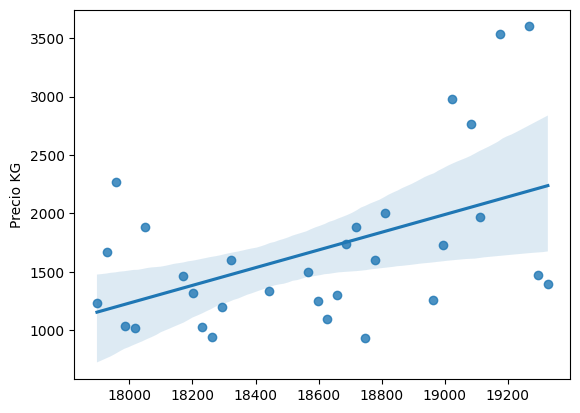

In [ ]:
sns.regplot(x=mdates.date2num(dfpc.index), y=dfpc['Precio KG'])


In [ ]:
dfpc['Fecha'] = dfpc.index


<ipython-input-155-050cd5fb0e43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpc['Fecha'] = dfpc.index


TypeError: ignored

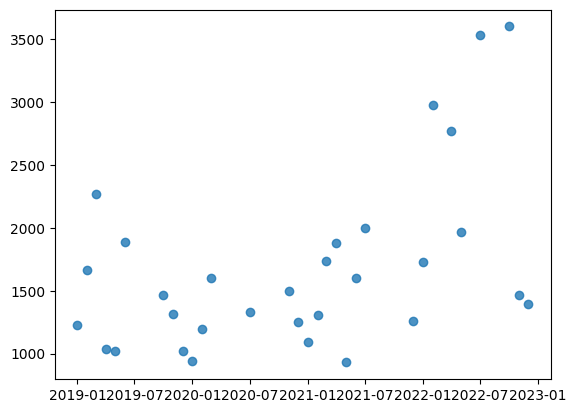

In [ ]:
sns.regplot(x=dfpc['Fecha'], y=dfpc['Precio KG'])


In [ ]:
# there is a problem in the conversion between matplotlib and csipy you could usse 
#df.index.to_pydatetime() works for me.


dfs = dfpc.loc['2022':'2023']
xs = dfpc.index
ys = dfpc['Precio KG']
lin_ress = linregress(xs,ys)

UFuncTypeError: ignored

In [ ]:
tips = sns.dfpc("tips")
sns.regplot(x="total_bill", y="tip", data=tips);

In [ ]:
dfs

<function matplotlib.pyplot.show(close=None, block=None)>

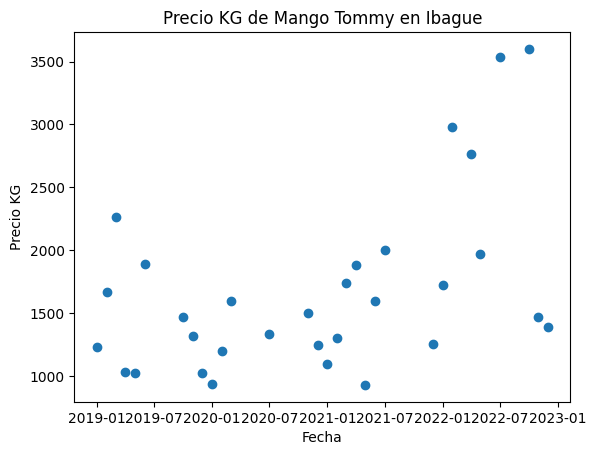

In [ ]:
x=dfpc.index
y=dfpc['Precio KG']
plt.title(t)
plt.xlabel('Fecha')
plt.ylabel('Precio KG')
plt.scatter(x,y)
plt.show